### By K-Means CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
#%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


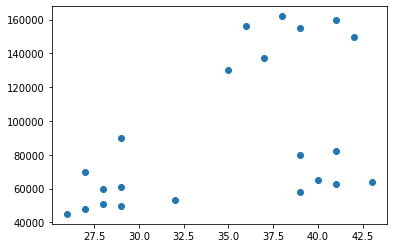

In [3]:
plt.scatter(data['Age'],data['Income($)'])

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) 
km

KMeans(n_clusters=3)

In [5]:
y_pred=km.fit_predict(data[["Age","Income($)"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
data['cluster'] = y_pred
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

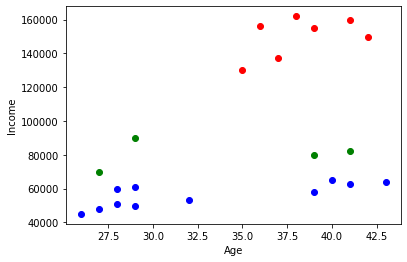

In [7]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Income")
#plt.legend()

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [9]:
data['Income($)'] = mms.fit_transform(data[['Income($)']])
data['Age'] = mms.fit_transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


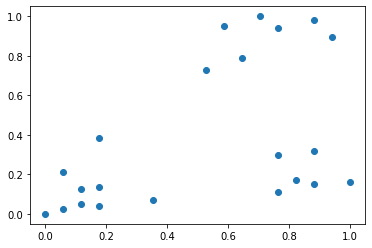

In [10]:
plt.scatter(data.Age,data['Income($)'])

In [11]:
ypred=km.fit_predict(data[["Age","Income($)"]])
ypred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
data['cluster'] = ypred
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [13]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

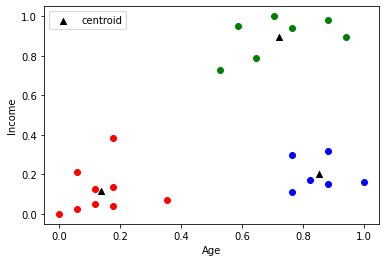

In [19]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='blue')
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker="^",label='centroid')
plt.legend()

## Elbow Plot

In [23]:
sse=[]
krange = range(1,11)
for i in krange:
    km =KMeans(n_clusters=i)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

Text(0, 0.5, 'sse')

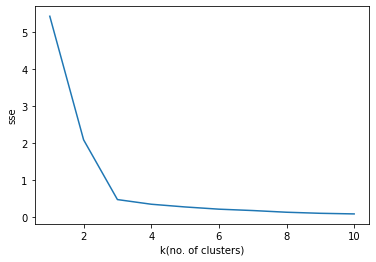

In [25]:
plt.plot(krange,sse)
plt.xlabel('k(no. of clusters)')
plt.ylabel('sse')

## The elbow approach shows how to determine the best "K"(optimal number of clusters) in a K-means clustering graphically. Here optimal "K" is 3.